In [2]:
# importation des bibliothèques
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# importation de la base de données
baseDonnee = pd.read_stata(r'Bases de données/BDD dpae-annuelles-france.dta')


In [3]:
baseDonnee

,Année,DonnéeAnnuelles7,DPAEbrut,DPAEcvs
0,2000,60.0,7065236.0,7125862.0
1,2001,60.0,7134290.0,7145918.0
2,2002,60.0,6754932.0,6715535.0
3,2003,60.0,6460986.0,6426484.0
4,2004,60.0,6570066.0,6551353.0
5,2005,60.0,6758036.0,6764073.0
6,2006,60.0,6956408.0,6959571.0
7,2007,60.0,7339761.0,7331686.0
8,2008,60.0,7225929.0,7175849.0
9,2009,60.0,6481521.0,6459952.0


<Axes: >

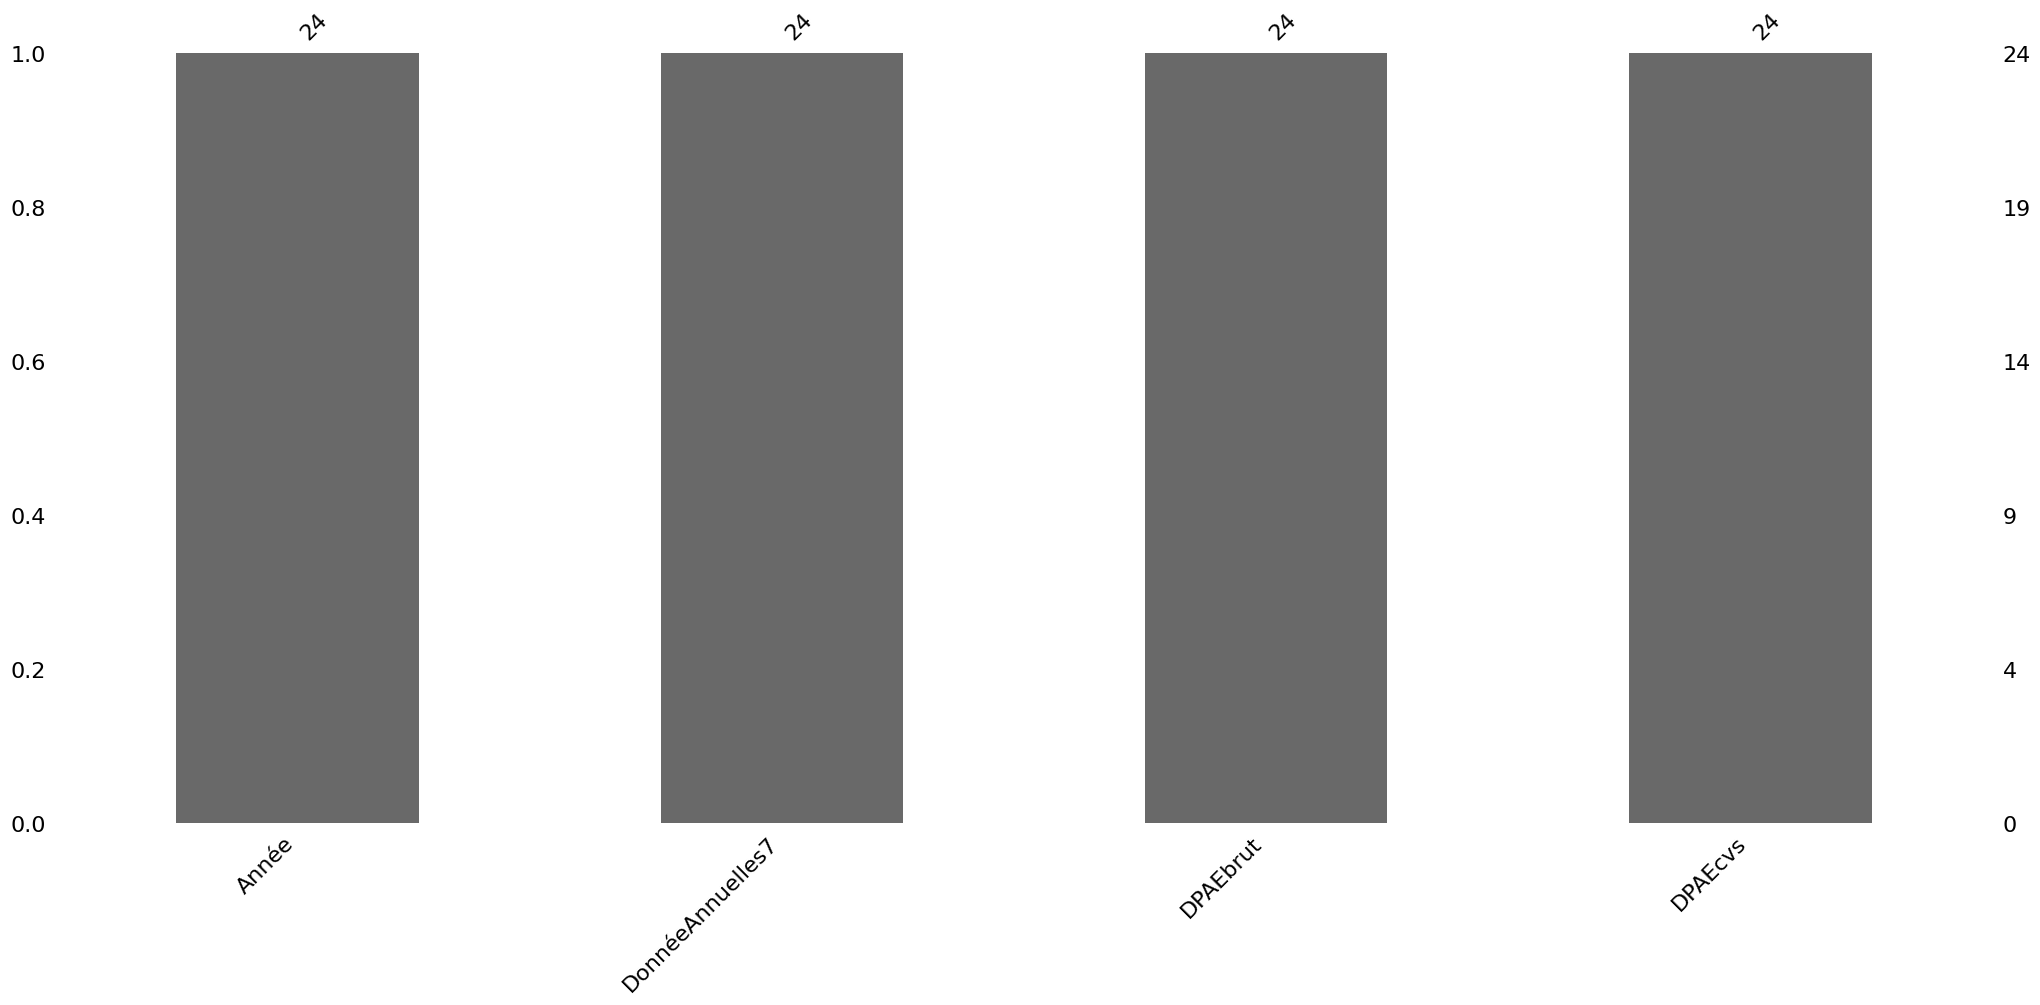

In [4]:
msno.bar(baseDonnee)


In [9]:
statistic= baseDonnee.drop(columns=['Année']).describe()
statistic

,DonnéeAnnuelles7,DPAEbrut,DPAEcvs
count,24.000000,2.400000e+01,2.400000e+01
mean,59.333333,7.438802e+06,7.412471e+06
std,3.265986,8.841074e+05,8.717870e+05
min,44.000000,6.460986e+06,6.426484e+06
25%,60.000000,6.893123e+06,6.871451e+06
50%,60.000000,7.107796e+06,7.123350e+06
75%,60.000000,7.656192e+06,7.692313e+06
max,60.000000,9.936606e+06,9.940364e+06


In [10]:
baseDonnee.columns

Index(['Année', 'DonnéeAnnuelles7', 'DPAEbrut', 'DPAEcvs'], dtype='object')

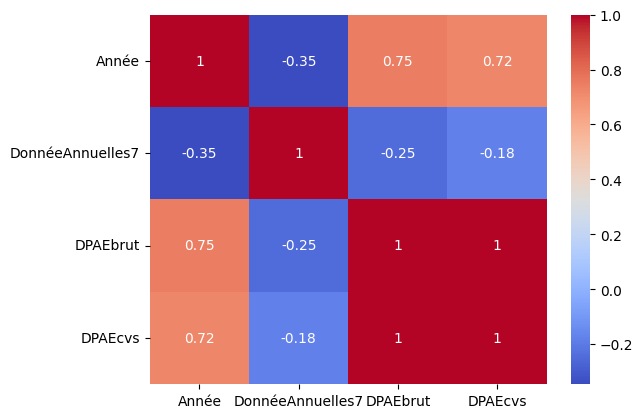

In [12]:
correlation = baseDonnee.corr()
sns.heatmap(correlation, annot= True, cmap='coolwarm') # visualisation de la corrélation des variables
plt.show() # affichage du graphique

In [16]:
import statsmodels.api as sms

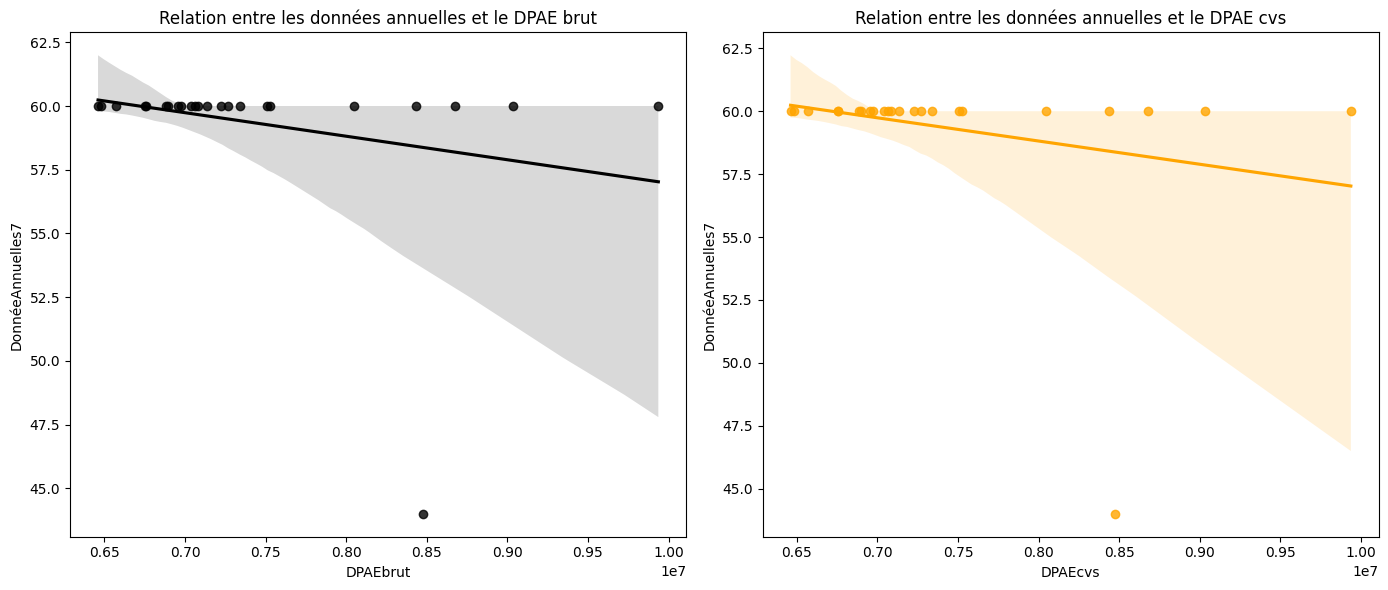

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.regplot(data=baseDonnee, x='DPAEbrut', y= 'DonnéeAnnuelles7', color='black', ax=ax[0])
ax[0].set(
    title='Relation entre les données annuelles et le DPAE brut',
    xlabel= 'DPAEbrut',
    ylabel='DonnéeAnnuelles7'
)

sns.regplot(data=baseDonnee, x='DPAEbrut', y='DonnéeAnnuelles7', color='orange', ax=ax[1])
ax[1].set(
    title='Relation entre les données annuelles et le DPAE cvs',
    xlabel='DPAEcvs',
    ylabel='DonnéeAnnuelles7'
)

plt.tight_layout()
plt.show()

In [23]:
# Divison des données ensemble d'entrainemenr et de test
y= baseDonnee['DonnéeAnnuelles7']#variable cible
x= baseDonnee[['DPAEbrut','DPAEcvs']]#variable prédicteur
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8,random_state=808)

# ajout des constants
x_train_const = sms.add_constant(x_train)
x_test_const = sms.add_constant(x_test)

# entrainement du model
model = sms.OLS(x_train_const, y_train).fit()
print(model.summary())

# prediction
y_pred = model.predict(x_test_const)

# évaluation des performances prédictives
rmse = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# affichage des résultats des métriques de performances
print("Mean Absolute Percentage Error (MAPE):", rmse)
print("Mean Absolute Error (MAE):", mae)

c:\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


ValueError: shapes (4,3) and (4,3) not aligned: 3 (dim 1) != 4 (dim 0)

In [24]:
import pandas as pd
import statsmodels.api as sms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Divison des données ensemble d'entrainement et de test
y= baseDonnee['DonnéeAnnuelles7']#variable cible
x= baseDonnee[['DPAEbrut','DPAEcvs']]#variable prédicteur

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=808)

# ajout des constantes
x_train_const = sms.add_constant(x_train)
x_test_const = sms.add_constant(x_test)

# entrainement du modèle
model = sms.OLS(y_train, x_train_const).fit()
print(model.summary())

# prédiction
y_pred = model.predict(x_test_const)

# évaluation des performances prédictives
rmse = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Percentage Error (MAPE):", rmse)
print("Mean Absolute Error (MAE):", mae)


c:\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                            OLS Regression Results                            
Dep. Variable:       DonnéeAnnuelles7   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                   -0.5000
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               1.00
Time:                        03:55:15   Log-Likelihood:                 105.53
No. Observations:                   4   AIC:                            -205.1
Df Residuals:                       1   BIC:                            -206.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.0000   7.36e-12   8.15e+12      0.0

In [27]:
residuals.count()

20

In [28]:
import statsmodels.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

In [29]:
# analyse des résidus
residuals = y_test - y_pred # les résidus pour l'évaluation du modèle

# test d'homoscédasticité
lm_statistic, lm_p_value, f_statistic, f_p_value = het_breuschpagan(residuals, x_test_const)

# affichage des résultat
print("Breusch-Pagan test statistic:", lm_statistic)
print("Breusch-Pagan test p-value:", lm_p_value)
print('fstatisitic :',f_statistic)
print('f_pvalue :',f_p_value)

# test de normaité de résidus
stat, p = shapiro(residuals)
print('stat :',stat)
print('p :',p)

# test d'autocorrélation des résidus
statistic =durbin_watson(residuals)
print('statistic durbin watson : ', statistic)

Breusch-Pagan test statistic: 17.529607009077065
Breusch-Pagan test p-value: 0.00015613281971332593
fstatisitic : 60.314962082809416
f_pvalue : 1.904392365621406e-08
stat : 0.23587389697723582
p : 2.6930778843234626e-09
statistic durbin watson :  1.0000000000000933
